In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from plot import plot_scatter_boundary

In [2]:
# Importing the dataset
dataset = pd.read_csv('./data/dataset-moons.csv')
X = dataset.iloc[:, [0,1]].values
Y = dataset.iloc[:, 2].values

In [3]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [4]:
class KNN():
    def __init__(self, K):
        self.K = K
        self.xs = None
        self.ys = None
    
    def fit(self, x_train, y_train):
        self.xs = x_train.copy()
        self.ys = y_train.copy().reshape((y_train.size, 1))

    def h(self, x_in):
        def sq_dist(elem1, elem2):
            return np.sum((elem1 - elem2) ** 2)

        distances = np.array([sq_dist(x_in, x) for x in self.xs])
        distances = distances.reshape((distances.size, 1))

        join = np.concatenate((self.xs, self.ys, distances), axis=1)
        dist_ind_order = np.argsort(join[:, -1])
        join = join[dist_ind_order]
        K_nearest = join[:self.K]
        labels = K_nearest[:, -2].astype('int')
        prediction = np.argmax(np.bincount(labels))
        return prediction
    
    def predict(self, xs):
        return np.array([self.h(x) for x in xs])

In [5]:
knn = KNN(3)
knn.fit(X_train, Y_train)

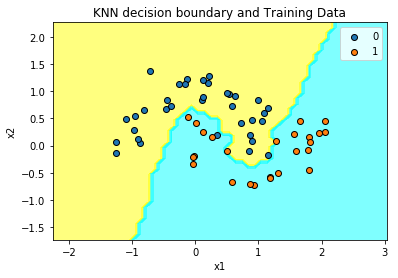

In [6]:
plot_scatter_boundary(knn, X_train, Y_train, "KNN decision boundary and Training Data")

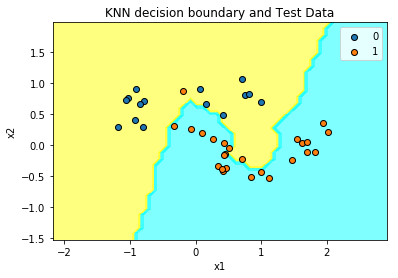

In [7]:
plot_scatter_boundary(knn, X_test, Y_test, "KNN decision boundary and Test Data")

In [8]:
predictions = knn.predict(X_test)
acc = accuracy_score(Y_test, predictions)
cm = confusion_matrix(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(acc * 100))
print('Confusion matrix:\n{}'.format(cm))

Accuracy: 95.00
Confusion matrix:
[[15  0]
 [ 2 23]]
